
Logistic regression is a statistical method used for classification tasks. It is widely used when the goal is to predict the probability of a binary outcome based on one or more predictor variables. This document provides a comprehensive overview of logistic regression, including data preprocessing, model application, and evaluation methods.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
df=pd.read_csv("/content/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [9]:
#fill missing numerica value with median
df.fillna(df.median(numeric_only=True), inplace=True)
#fill missing categorical value with mode
for col in df.select_dtypes(include=['object']):
  df[col].fillna(df[col].mode()[0], inplace=True)

In [10]:
df.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [11]:
X=df.drop('TenYearCHD', axis=1)
y=df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=LogisticRegression()
model.fit(X_train , y_train)
y_pred=model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy 0.8549528301886793
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.56      0.04      0.08       124

    accuracy                           0.85       848
   macro avg       0.71      0.52      0.50       848
weighted avg       0.81      0.85      0.80       848

Confusion Matrix:
 [[720   4]
 [119   5]]


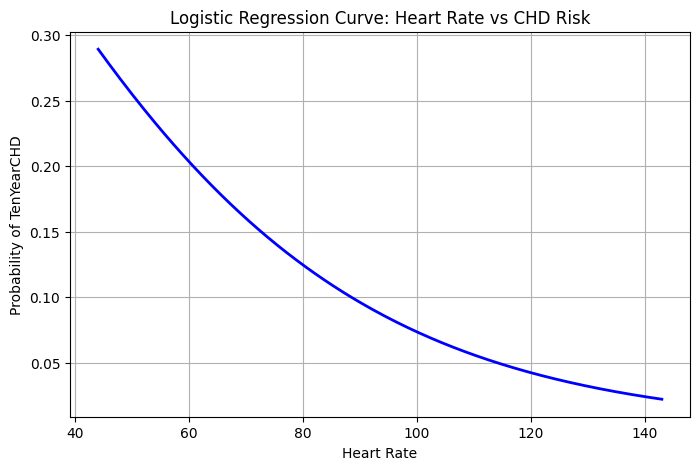

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Select heartRate feature for testing range
heart_rate_range = np.linspace(df['heartRate'].min(), df['heartRate'].max(), 300).reshape(-1, 1)

# Create a full input matrix for prediction using average values for other features
X_sample = pd.DataFrame(np.tile(X_train.mean().values, (300, 1)), columns=X.columns)
X_sample['heartRate'] = heart_rate_range.flatten()

# Predict probabilities
y_proba = model.predict_proba(X_sample)[:, 1]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(heart_rate_range, y_proba, color='blue', linewidth=2)
plt.xlabel('Heart Rate')
plt.ylabel('Probability of TenYearCHD')
plt.title('Logistic Regression Curve: Heart Rate vs CHD Risk')
plt.grid(True)
plt.show()
